<a href="https://colab.research.google.com/github/zyf2021/freeCodeCamp/blob/main/Top_1000_IMDb_movies_New_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
Welcome to the "Top 1000 IMDb Movies Dataset" - a treasure trove of cinematic excellence! This comprehensive collection presents the most celebrated and beloved movies, as rated and ranked by IMDb users. Whether you're a movie enthusiast, a data scientist, or a filmmaker seeking inspiration, this dataset promises a thrilling journey through the world of cinema's finest creations.

## Description

###Content
This dataset boasts a rich array of movie attributes to help you delve into the realm of top-rated films:

Movie Name: The title of each movie, representing iconic masterpieces that have left an indelible mark on the film industry and audiences worldwide.

Year of Release: The year when each movie was released, providing valuable context for historical and chronological analyses.

Watch Time: The duration of each movie, allowing you to identify captivating films for various viewing preferences.

Movie Rating: IMDb's user ratings, serving as a benchmark for gauging audience reception and appreciation.

Metascore of Movie: Metascores from renowned critics, offering insights into the films' critical acclaim and recognition.

Gross Earnings: The worldwide box office earnings, reflecting the commercial success and popularity of each movie.

Votes: The number of votes cast by IMDb users, indicating the films' popularity and reach.

Description: Brief summaries that provide a glimpse into the captivating plots and themes of these cinematic marvels.

###Usage:

The "Top 1000 IMDb Movies Dataset" opens up a world of possibilities for movie aficionados and data enthusiasts alike:

Film Analysis and Insights: Dive into data-driven analyses to uncover intriguing patterns, trends, and correlations among highly-rated movies.

Rating Predictions: Develop predictive models to estimate movie ratings based on other attributes and gain a deeper understanding of factors influencing user perceptions.

Box Office Performance: Examine the relationship between critical acclaim, ratings, and box office success, providing valuable insights for filmmakers and producers.

Genre Exploration: Investigate the distribution of top-rated movies across different genres to identify trends in audience preferences.

Temporal Trends: Analyze changes in movie ratings, box office performance, and viewer preferences over time to reveal shifts in cinematic taste and trends.

##Подотовка

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Top_1000_IMDb_movies_New_version.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  845 non-null    float64
 6   Gross               838 non-null    object 
 7   Votes               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Unnamed: 0,Watch Time,Movie Rating,Metascore of movie
count,1000.000000,1000.000000,1000.000000,845.000000
mean,499.500000,124.253000,7.970200,79.011834
std,288.819436,28.800355,0.275732,11.973800
min,0.000000,45.000000,7.600000,28.000000
25%,249.750000,103.000000,7.800000,71.000000
50%,499.500000,120.000000,7.900000,80.000000
75%,749.250000,139.000000,8.100000,88.000000
max,999.000000,321.000000,9.300000,100.000000


Заполнили отсутсвующие данные

<Axes: >

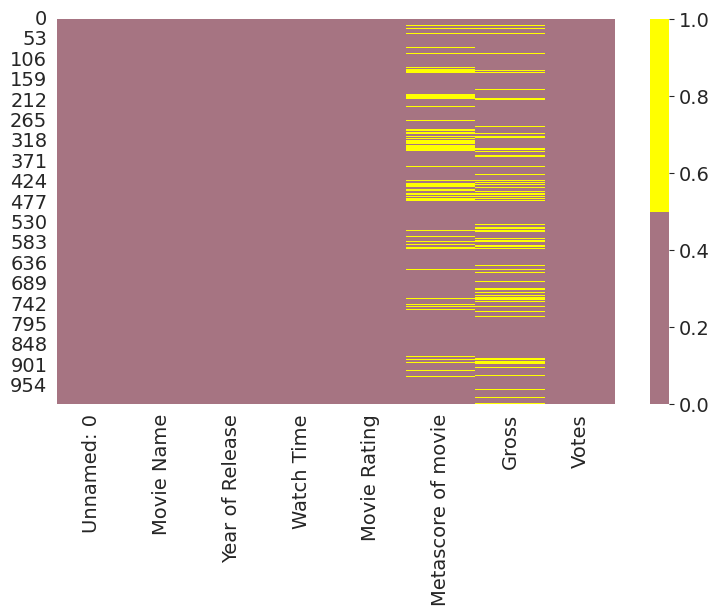

In [7]:
cols = df.columns[:8] # первые 30 колонок
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#A67482', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing * 100)))

Unnamed: 0 - 0%
Movie Name - 0%
Year of Release - 0%
Watch Time - 0%
Movie Rating - 0%
Metascore of movie - 16%
Gross - 16%
Votes - 0%
Description - 0%


Поменяем типы данных в Годах, Gross и Votes

In [9]:
df['Year of Release'] = df['Year of Release'].str.replace("(","", regex = True).str.replace(")","", regex = True).str.replace("I","", regex = True)
df['Year of Release'] = df['Year of Release'].astype(int)

In [10]:
df['Gross'] = df['Gross'].str.replace("$","",regex = True).str.replace("M","",regex = True).str.replace("#","",regex = True).astype(float)
df = df.rename(columns = {'Gross':'Gross(M)'})

In [11]:
df['Votes'] = df['Votes'].str.replace(',','', regex=True)
df['Votes'] = df['Votes'].astype(int)

Посмотрим на данные таблицы теперь

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   int64  
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  845 non-null    float64
 6   Gross(M)            838 non-null    float64
 7   Votes               1000 non-null   int64  
 8   Description         1000 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 70.4+ KB


Заполним данные медианными значениями

In [13]:
median = df['Gross(M)'].median()
df['Gross(M)'] = df['Gross(M)'].fillna(median)

median = df['Metascore of movie'].median()
df['Metascore of movie'] = df['Metascore of movie'].fillna(median)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   int64  
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  1000 non-null   float64
 6   Gross(M)            1000 non-null   float64
 7   Votes               1000 non-null   int64  
 8   Description         1000 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 70.4+ KB


##Поработаем с индексами

In [ ]:
df.loc[:,['Movie Name', 'Year of Release']]

,Movie Name,Year of Release
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,Schindler's List,1993
4,12 Angry Men,1957
...,...,...
995,Philomena,2013
996,Un long dimanche de fiançailles,2004
997,Shine,1996
998,The Invisible Man,1933


In [ ]:
print(df.loc[2, 'Year of Release'])
print(df.loc[2]['Year of Release'])

2008
2008


In [ ]:
df.loc[0]

Unnamed: 0                                                            0
Movie Name                                     The Shawshank Redemption
Year of Release                                                    1994
Watch Time                                                          142
Movie Rating                                                        9.3
Metascore of movie                                                 82.0
Gross(M)                                                          28.34
Votes                                                           2777378
Description           Over the course of several years, two convicts...
Name: 0, dtype: object

Посложнее... с IF
Получим фильмы с рейтингом выше 8

In [ ]:
df.loc[df['Movie Rating'] > 8, ['Movie Name', 'Year of Release', 'Movie Rating']]

,Movie Name,Year of Release,Movie Rating
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,Schindler's List,1993,9.0
4,12 Angry Men,1957,9.0
...,...,...,...
339,Eskiya,1996,8.1
340,Chak De! India,2007,8.1
341,Black,2005,8.1
342,Her Sey Çok Güzel Olacak,1998,8.1


In [ ]:
df.loc[lambda x: x['Year of Release'] > 2000]

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross(M),Votes,Description
2,2,The Dark Knight,2008,152,9.0,84.0,534.860,2754087,When the menace known as the Joker wreaks havo...
5,5,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,377.850,1904166,Gandalf and Aragorn lead the World of Men agai...
7,7,Spider-Man: Across the Spider-Verse,2023,140,8.9,86.0,15.000,198031,"Miles Morales catapults across the Multiverse,..."
9,9,Inception,2010,148,8.8,74.0,292.580,2444816,A thief who steals corporate secrets through t...
11,11,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,92.0,315.540,1932439,A meek Hobbit from the Shire and eight compani...
...,...,...,...,...,...,...,...,...,...
992,992,21 Grams,2003,124,7.6,70.0,16.290,241941,A freak accident brings together a critically ...
994,994,Control,2007,122,7.6,78.0,0.870,67244,"A profile of Ian Curtis, the enigmatic singer ..."
995,995,Philomena,2013,98,7.6,77.0,37.710,102336,A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.170,75004,Tells the story of a young woman's relentless ...


##Ответим на вопросы

Агрегация данных

In [63]:
a = df.loc[:, ['Movie Name', 'Movie Rating', 'Year of Release']].groupby(by = ['Year of Release']).mean()

<ipython-input-63-e8e1dfa3fef4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = df.loc[:, ['Movie Name', 'Movie Rating', 'Year of Release']].groupby(by = ['Year of Release']).mean()


,Movie Name,Movie Rating
Year of Release,,
1920,1,1
1921,1,1
1922,1,1
1924,1,1
1925,2,2
...,...,...
2019,26,26
2020,9,9
2021,11,11


### Вопрос 1

Сколько фильмов в какой год было. Построить столбчатую диаграмму

**Как сделать так, что отсортировалось по годам?**

Int64Index([2004, 2014, 2013, 2016, 2001, 2019, 2007, 2009, 2012, 2006,
            ...
            1932, 1977, 1936, 1920, 1926, 1930, 1922, 1921, 1924, 1943],
           dtype='int64', length=102)


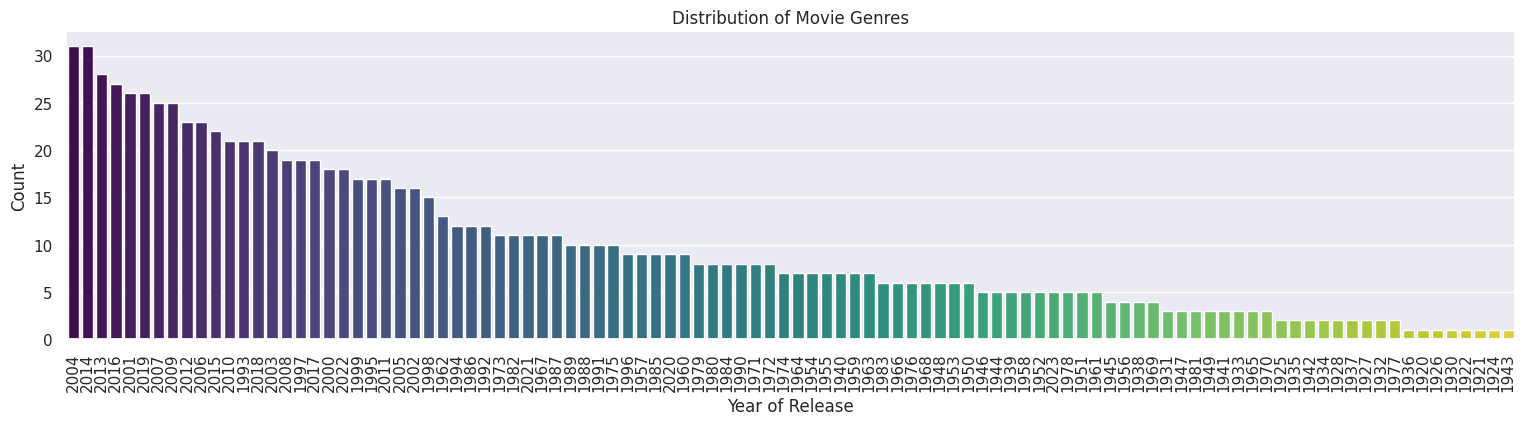

In [35]:
year_counts = df['Year of Release'].value_counts()

sorted_years = year_counts.sort_values(ascending=False).index
print(sorted_years)
color_palette = sns.color_palette("viridis", n_colors=len(sorted_years))

sns.set(rc={'figure.figsize':(18.7,4)})

sns.countplot(data=df, x='Year of Release', order=sorted_years, palette=color_palette)


plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation = 90)
plt.show()

### Вопрос 2

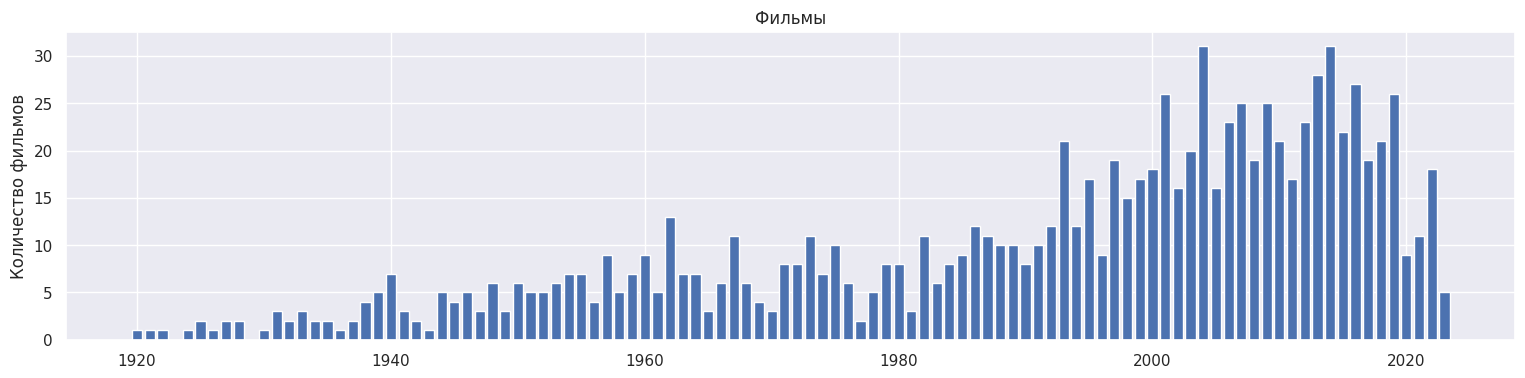

In [67]:
b = df.loc[:, ['Movie Name', 'Movie Rating', 'Year of Release']].groupby(by = ['Year of Release']).count()

x = b.index
y = b['Movie Rating']

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_ylabel('Количество фильмов')
ax.set_title('Фильмы')

plt.show()

Построим график